In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv("../csv/city_pov_2016.csv", encoding="latin-1")

In [3]:
df = df.replace("N", np.nan)
df = df.fillna('0')

In [4]:
df.rename(columns={'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people': 'Per_below_pov'}, inplace=True)

In [5]:
df.columns

Index(['Id', 'Id2', 'Geography',
       'Estimate; EMPLOYMENT STATUS - Population 16 years and over',
       'Estimate; EMPLOYMENT STATUS - Civilian labor force',
       'Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate',
       'Estimate; OCCUPATION - Civilian employed population 16 years and over',
       'Estimate; OCCUPATION - Civilian employed population 16 years and over - Management, business, science, and arts occupations',
       'Percent; OCCUPATION - Civilian employed population 16 years and over - Management, business, science, and arts occupations',
       'Estimate; OCCUPATION - Civilian employed population 16 years and over - Service occupations',
       'Percent; OCCUPATION - Civilian employed population 16 years and over - Service occupations',
       'Estimate; OCCUPATION - Civilian employed population 16 years and over - Sales and office occupations',
       'Percent; OCCUPATION - Civilian employed population 16 years and over - Sales and office 

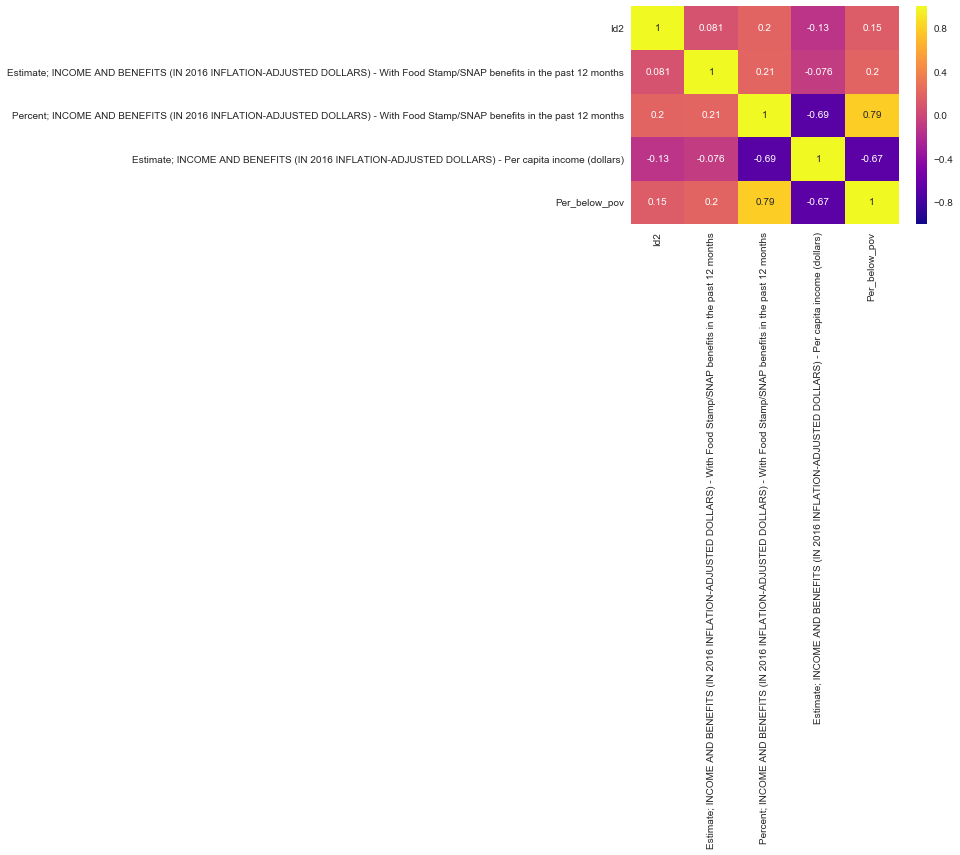

In [6]:
finding_correlations = sns.heatmap(df.corr(), annot=True, cmap=plt.cm.plasma)


In [58]:
df[df.columns[1:]].corr()['Per_below_pov'][:-1]

Id2                                                                                                                         0.148921
Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months    0.198592
Percent; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months     0.790431
Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)                           -0.667832
Name: Per_below_pov, dtype: float64

Pov v. Manufacturing
=============

In [7]:
depe = df['Per_below_pov']
indep1 = df['Percent; INDUSTRY - Civilian employed population 16 years and over - Manufacturing']

In [8]:
X = indep1.values.reshape(-1, 1)
y = depe.values.reshape(-1, 1)

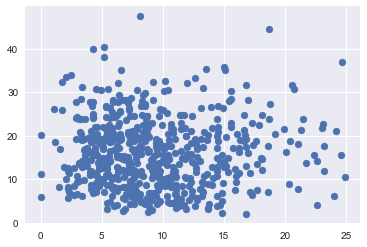

In [9]:
plt.scatter(X, y)

In [10]:
linearR = LinearRegression()
linearR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print('Weight coefficients: ', linearR.coef_)
print('y-axis intercept: ', linearR.intercept_)

Weight coefficients:  [[0.01410632]]
y-axis intercept:  [15.581975]


In [12]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [['0']]
Max X Value: [['9.9']]


Pov v. Benefits received PCI
==============

In [13]:
X = df['Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)'].values.reshape(-1, 1)
y = depe.values.reshape(-1, 1)

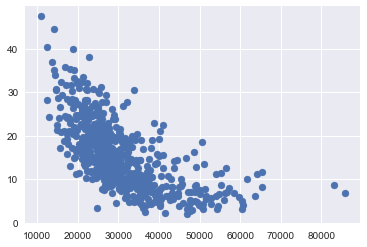

In [14]:
plt.scatter(X, y)

In [15]:
linearR = LinearRegression()
linearR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print('Weight coefficients: ', linearR.coef_)
print('y-axis intercept: ', linearR.intercept_)

Weight coefficients:  [[-0.00049724]]
y-axis intercept:  [30.82453096]


In [17]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[10884]]
Max X Value: [[85801]]


In [18]:
y_min = linearR.predict(x_min)
y_max = linearR.predict(x_max)

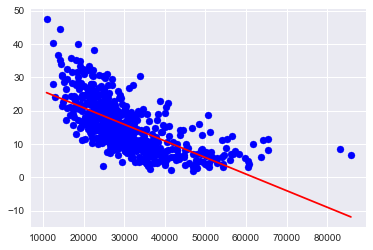

In [19]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
linearR.fit(X_train, y_train)
# Use our model to make predictions
predicted = linearR.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
sc = linearR.score(X_test, y_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
print(f"Score (SC): {sc}")

Mean Squared Error (MSE): 38.71541136432717
R-squared (R2 ): 0.4546671974799472
Score (SC): 0.45466719747994727


POV v. Food Stamp (% on FS)
==============

In [21]:
X = df['Percent; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months'].values.reshape(-1, 1)
y = depe.values.reshape(-1, 1)

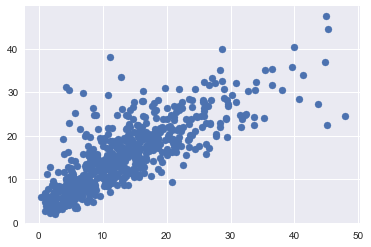

In [22]:
plt.scatter(X, y)

In [23]:
linearR = LinearRegression()
linearR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.3]]
Max X Value: [[47.9]]


In [25]:
y_min = linearR.predict(x_min)
y_max = linearR.predict(x_max)

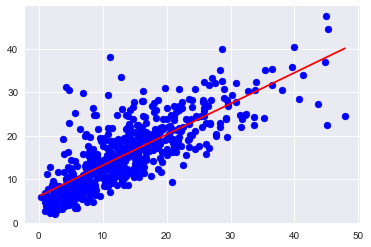

In [26]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
linearR.fit(X_train, y_train)
# Use our model to make predictions
predicted = linearR.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
sc = linearR.score(X_test, y_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
print(f"Score (SC): {sc}")

Mean Squared Error (MSE): 32.574759807231445
R-squared (R2 ): 0.5411624355498097
Score (SC): 0.5411624355498097


Pov v Food Stamp (Est. # of FS)
================

In [28]:
X = df['Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months'].values.reshape(-1, 1)
y = depe.values.reshape(-1, 1)

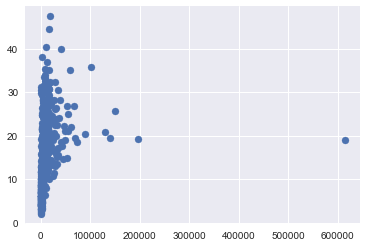

In [29]:
plt.scatter(X, y)

In [30]:
linearR = LinearRegression()
linearR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[129]]
Max X Value: [[614522]]


In [32]:
y_min = linearR.predict(x_min)
y_max = linearR.predict(x_max)

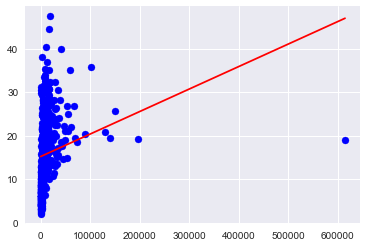

In [33]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/jayklein95/anaconda/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [35]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/jayklein95/anaconda/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [36]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

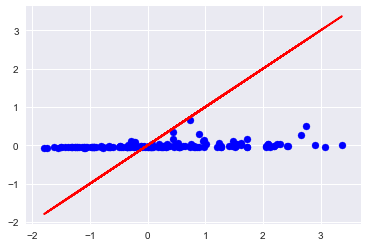

In [37]:
predictions = model.predict(X_test_scaled)
plt.plot(y_test_scaled, y_test_scaled, c='red')
plt.scatter(y_test_scaled, predictions, c='blue')
plt.show()

In [38]:
predicted = model.predict(X_test_scaled)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test_scaled, predicted)
r2 = r2_score(y_test_scaled, predicted)
sc = linearR.score(X_test_scaled, y_test_scaled)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
print(f"Score (SC): {sc}")

Mean Squared Error (MSE): 1.2777828533046633
R-squared (R2 ): 0.007000691457090369
Score (SC): -173.40584493362104


Multivariate 
=======

In [39]:
X = df[[
    'Percent; OCCUPATION - Civilian employed population 16 years and over - Management, business, science, and arts occupations',
    'Percent; OCCUPATION - Civilian employed population 16 years and over - Service occupations',
    'Percent; OCCUPATION - Civilian employed population 16 years and over - Sales and office occupations',
    'Percent; OCCUPATION - Civilian employed population 16 years and over - Natural resources, construction, and maintenance occupations',
    'Percent; OCCUPATION - Civilian employed population 16 years and over - Production, transportation, and material moving occupations',    
]]

y = df['Per_below_pov']

In [40]:
x1 = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [41]:
print(X.shape)
print(x1.shape)
print(y.shape)


(605, 5)
(3025, 1)
(605, 1)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [44]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [45]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

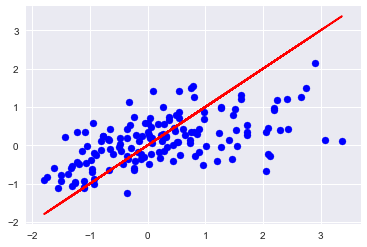

In [46]:
predictions = model.predict(X_test_scaled)
plt.plot(y_test_scaled, y_test_scaled, c='red')
plt.scatter(y_test_scaled, predictions, c='blue')
plt.show()

In [47]:
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8712935415609412, R2: 0.3228944322814229


In [48]:
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8730012242975367, R2: 0.32156734624934435


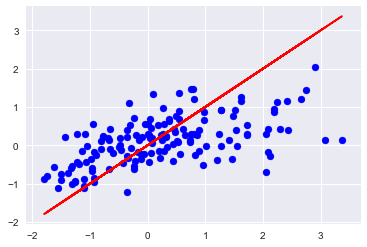

In [49]:
predictions2 = lasso.predict(X_test_scaled)
plt.plot(y_test_scaled, y_test_scaled, c='red')
plt.scatter(y_test_scaled, predictions2, c='blue')
plt.show()

In [50]:
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8712962593713062, R2: 0.3228923201981324


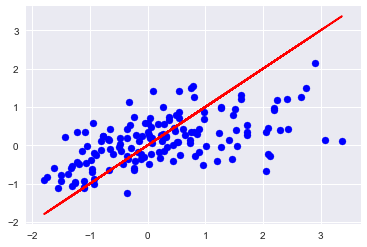

In [51]:
predictions3 = ridge.predict(X_test_scaled)
plt.plot(y_test_scaled, y_test_scaled, c='red')
plt.scatter(y_test_scaled, predictions3, c='blue')
plt.show()

Seperately looking at the variables in the multivariate regro

df2 = df[[
    'Percent; OCCUPATION - Civilian employed population 16 years and over - Management, business, science, and arts occupations',
    'Percent; OCCUPATION - Civilian employed population 16 years and over - Service occupations',
    'Percent; OCCUPATION - Civilian employed population 16 years and over - Sales and office occupations',
    'Percent; OCCUPATION - Civilian employed population 16 years and over - Natural resources, construction, and maintenance occupations',
    'Percent; OCCUPATION - Civilian employed population 16 years and over - Production, transportation, and material moving occupations',
    'Per_below_pov'
]]

In [61]:
X3 = df['Percent; OCCUPATION - Civilian employed population 16 years and over - Management, business, science, and arts occupations'].values.reshape(-1, 1)
y3 = df['Per_below_pov'].values.reshape(-1, 1)

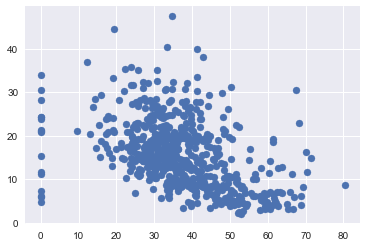

In [62]:
plt.scatter(X3, y3)

In [64]:
LR3 = LinearRegression()
LR3.fit(X3, y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
print('Weight coefficients: ', LR3.coef_)
print('y-axis intercept: ', LR3.intercept_)

Weight coefficients:  [[-0.25978944]]
y-axis intercept:  [25.29506302]


In [66]:
x3_min = np.array([[X3.min()]])
x3_max = np.array([[X3.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[129]]
Max X Value: [[614522]]


TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'